In [1]:
using DelimitedFiles
using Plots

In [2]:
function analytical_psi(t, x)
    return sin(2 * pi * (x - t))
end

analytical_psi (generic function with 1 method)

#### Functions

In [3]:
function plot_conv(dirs, nxs, nbuf;
                   lev = 1, tmax = 1.0, cord = 4, parent_dir = expanduser("~/docker-workspace/simulations/"))
    nxas = nxs .+ 2*nbuf
    plt = plot()
    for i in 1:length(dirs)
        fulldir = parent_dir * dirs[i]
        tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
        for fname in tsv_files
            data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
            if abs(data[1, 2] - tmax) < 1e-12
                x = data[findall(x -> x == lev, data[:, 3]), 5][1+nbuf:nxas[i]-nbuf]
                psi = data[findall(x -> x == lev, data[:, 3]), 6][1+nbuf:nxas[i]-nbuf]
                error = (psi - analytical_psi.(tmax, x))
                plt = plot!(x, error * (2^cord)^(i-1))
            end
        end
    end
    display(plt)
end

plot_conv (generic function with 1 method)

## 2 Levels with Mongwane's Subcycling

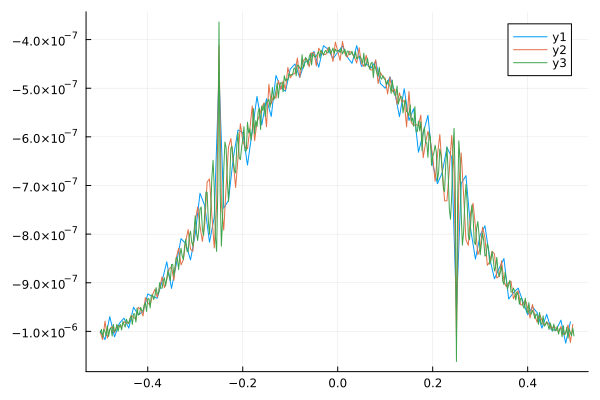

In [4]:
nxs = [100, 200, 400]
nbuf = 2
plot_conv(
    [
        "scalarwave_2levels_nx100_Mongwane",
        "scalarwave_2levels_nx200_Mongwane",
        "scalarwave_2levels_nx400_Mongwane"
    ],
    nxs, nbuf; lev = 1, cord = 4)

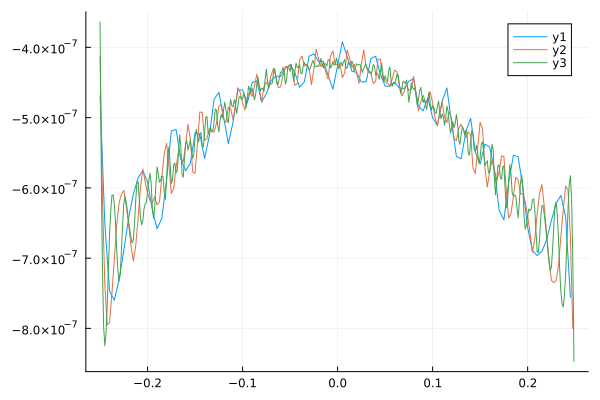

In [5]:
nxs = [100, 200, 400]
nbuf = 2
plot_conv(
    [
        "scalarwave_2levels_nx100_Mongwane",
        "scalarwave_2levels_nx200_Mongwane",
        "scalarwave_2levels_nx400_Mongwane"
    ],
    nxs, nbuf; lev = 2, cord = 4)

## Uniform Grid (4-th order convergent)

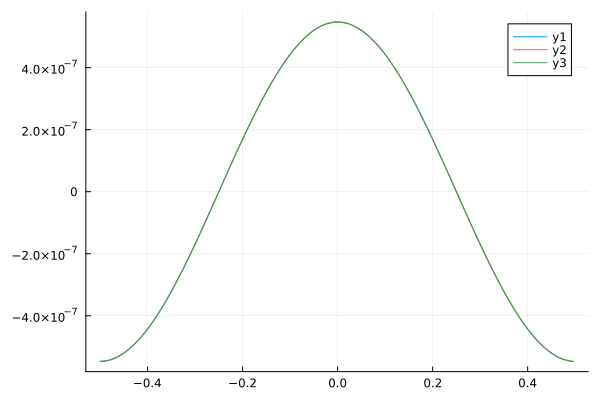

In [6]:
nxs = [100, 200, 400]
nbuf = 2
plot_conv(
    [
        "scalarwave_1levels_nx100",
        "scalarwave_1levels_nx200",
        "scalarwave_1levels_nx400"
    ],
    nxs, nbuf; lev = 1, cord = 4)

## 2 Levels without Subcycling

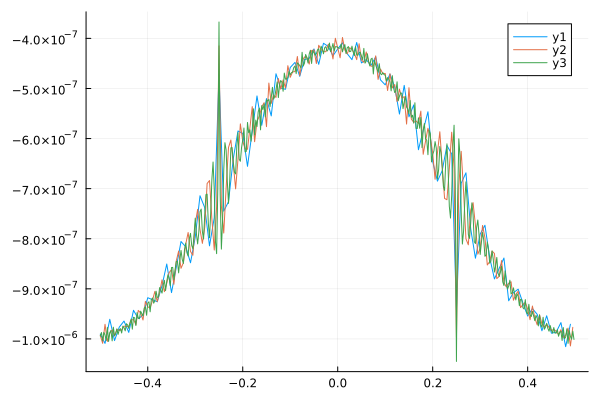

In [7]:
nxs = [100, 200, 400]
nbuf = 8
plot_conv(
    [
        "scalarwave_2levels_nx100_noSC",
        "scalarwave_2levels_nx200_noSC",
        "scalarwave_2levels_nx400_noSC"
    ],
    nxs, nbuf; lev = 1, cord = 4)

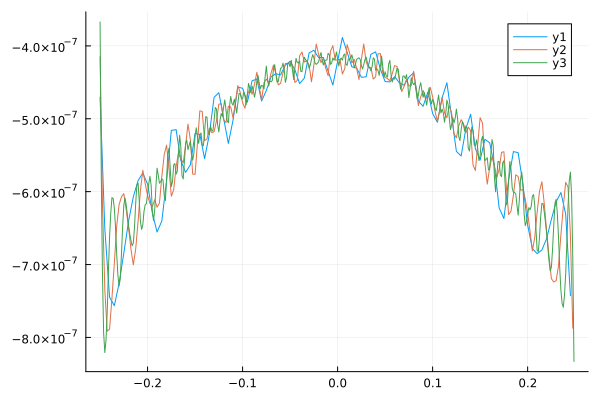

In [8]:
nxs = [100, 200, 400]
nbuf = 8
plot_conv(
    [
        "scalarwave_2levels_nx100_noSC",
        "scalarwave_2levels_nx200_noSC",
        "scalarwave_2levels_nx400_noSC"
    ],
    nxs, nbuf; lev = 2, cord = 4)

## 2 Levels with Subcycling

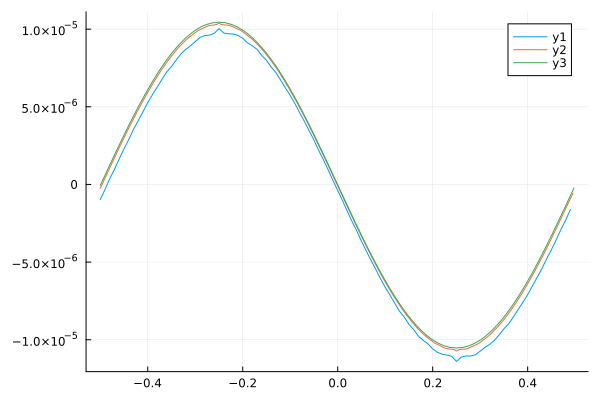

In [9]:
nxs = [100, 200, 400]
nbuf = 8
plot_conv(
    [
        "scalarwave_2levels_nx100",
        "scalarwave_2levels_nx200",
        "scalarwave_2levels_nx400"
    ],
    nxs, nbuf; lev = 1, cord = 2)

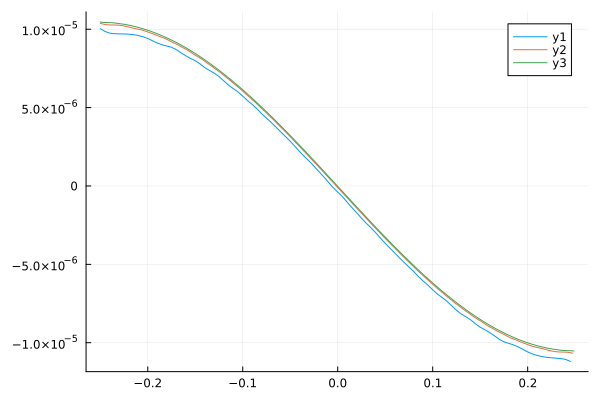

In [10]:
nxs = [100, 200, 400]
nbuf = 8
plot_conv(
    [
        "scalarwave_2levels_nx100",
        "scalarwave_2levels_nx200",
        "scalarwave_2levels_nx400"
    ],
    nxs, nbuf; lev = 2, cord = 2)